In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Set notebook display
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# import data analysis libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.getcwd()

'/Users/rolf/Downloads/noncomp/rank/program'

In [4]:
equal_thres_phi03_path = os.path.join(os.path.abspath('..'), 'results', 
                                       'outranking_matrix','equal_threshod_00_10_phi0.3', 'total_rank.csv')

if os.path.exists(equal_thres_phi03_path):
    print('File path: ', equal_thres_phi03_path)
else:
    print('Check the path')

File path:  /Users/rolf/Downloads/noncomp/rank/results/outranking_matrix/equal_threshod_00_10_phi0.3/total_rank.csv


In [5]:
equal_thres_phi03_data = pd.read_csv(equal_thres_phi03_path, index_col = 0)

In [6]:
equal_thres_phi03_data.head()

,equal_threshold_00,equal_threshold_01,equal_threshold_02,equal_threshold_03,equal_threshold_04,equal_threshold_05,equal_threshold_06,equal_threshold_07,equal_threshold_08,equal_threshold_09,equal_threshold_10
Beijing,2,2,1,1,1,1,1.0,1,1,1,1
Tianjin,29,29,29,31,33,34,35.0,37,36,32,35
Shijiazhuang,33,34,34,32,29,28,29.0,28,27,29,30
Qinhuangdao,27,26,24,24,21,19,18.0,16,18,22,21
Baoding,36,37,35,30,30,31,33.0,32,33,30,32


In [7]:
equal_thres_phi03_data_trans = equal_thres_phi03_data.T

equal_thres_phi03_data_trans.head()

,Beijing,Tianjin,Shijiazhuang,Qinhuangdao,Baoding,Taiyuan,Hohhot,Shenyang,Dalian,Changchun,...,Guilin,Haikou,Chongqing,Chengdu,Guiyang,Zunyi,Kunming,Xian,Lanzhou,Urumqi
equal_threshold_00,2.0,29.0,33.0,27.0,36.0,40.0,13.0,31.0,9.0,28.0,...,39.0,7.0,38.0,8.0,10.0,37.0,5.0,24.0,23.0,16.0
equal_threshold_01,2.0,29.0,34.0,26.0,37.0,40.0,12.0,33.0,8.0,31.0,...,39.0,9.0,38.0,7.0,11.0,35.0,6.0,22.0,24.0,14.0
equal_threshold_02,1.0,29.0,34.0,24.0,35.0,40.0,14.0,33.0,7.0,32.0,...,38.0,13.0,39.0,11.0,8.0,36.0,9.0,21.0,25.0,12.0
equal_threshold_03,1.0,31.0,32.0,24.0,30.0,40.0,15.0,35.0,5.0,34.0,...,37.0,13.0,39.0,8.0,11.0,36.0,10.0,18.0,25.0,9.0
equal_threshold_04,1.0,33.0,29.0,21.0,30.0,40.0,15.0,32.0,5.0,35.0,...,37.0,13.0,39.0,7.0,11.0,34.0,10.0,19.0,26.0,8.0


In [8]:
# plot comparative boxplot of rank for forty cities

def rank_boxplot(data):
    fig, ax = plt.subplots()
    
    font = {'family' : 'serif', 
            'color'  : 'k', 
            'weight' : 'normal', 
            'size'   : 6
           } 
    
    meanprops = dict(marker = '^', markerfacecolor='none', 
                     markersize=4, linestyle='none', linewidth = 0.5)
    
    sns.set_style('ticks')
    
    _, boxplot = data.boxplot(ax = ax, grid = False, figsize = (10, 8),
                                                showmeans = False, meanprops = meanprops, return_type = 'both')
    
    ax.set_xticklabels(list(data.columns),rotation = 'vertical', 
                   fontdict=font, ha = 'center', va = 'baseline')
    
    # ax.set_yticks(np.linspace(0,1,6))
    # ax.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], fontdict = font)
    plt.show()
    
    return fig


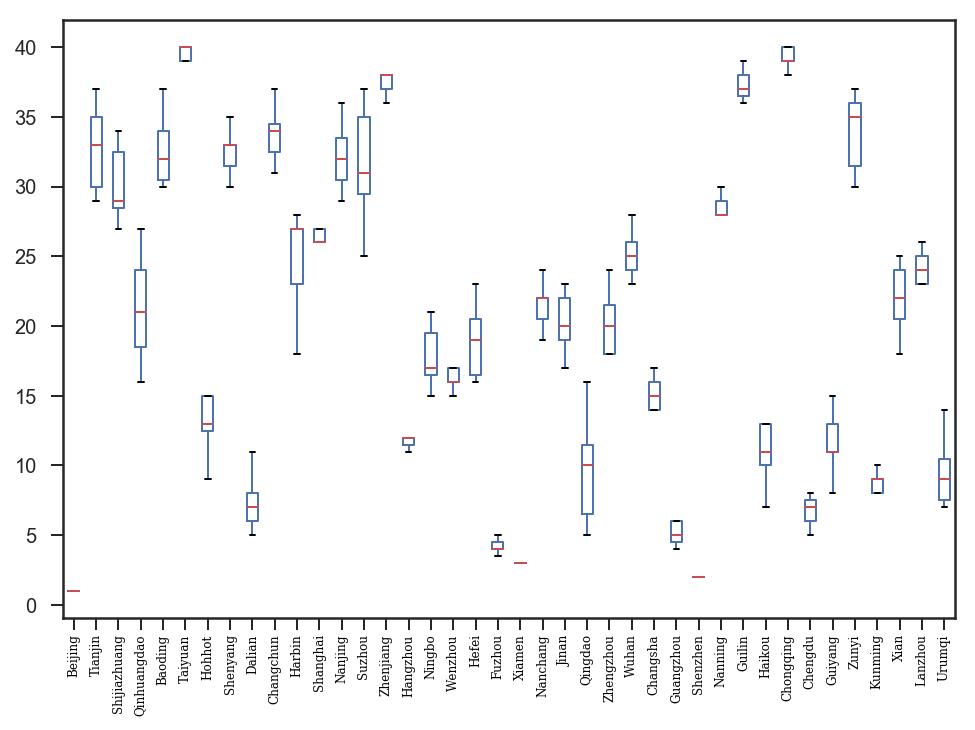

In [10]:
equal_thres_phi03_rank_boxplot = rank_boxplot(equal_thres_phi03_data_trans)

In [12]:
equal_thres_phi03_rank_boxplot.savefig('../results/equal_threshod_00_10_phi0.3_boxplot.pdf')

In [11]:
equal_thres_phi03_data_trans.index[0]

'equal_threshold_00'

In [12]:
# generate a new DataFrame for store the rank shift with respect to the reference rank. Here, the reference rank 
# is the rank without consideration of thresholds

def rank_shift(DataFrame, reference_rank_row_index):
    rank_shift_data_frame = pd.DataFrame(index = DataFrame.index, columns = DataFrame.columns)
    
#     Exclude the reference rank
    rank_shift_data_frame.drop(reference_rank_row_index, inplace = True)
    
    rows, columns = rank_shift_data_frame.shape
    
    for column in range(columns):
        for row in range(rows):
            rank_shift_data_frame.iloc[row, column] = DataFrame.iloc[row+1, column] - DataFrame.iloc[0, column]
            
    return rank_shift_data_frame

In [13]:
rank_shift_data_frame = rank_shift(equal_thres_phi03_data_trans,equal_thres_phi03_data_trans.index[0])

rank_shift_data_frame.head()

,Beijing,Tianjin,Shijiazhuang,Qinhuangdao,Baoding,Taiyuan,Hohhot,Shenyang,Dalian,Changchun,...,Guilin,Haikou,Chongqing,Chengdu,Guiyang,Zunyi,Kunming,Xian,Lanzhou,Urumqi
equal_threshold_01,0,0,1,-1,1,0,-1,2,-1,3,...,0,2,0,-1,1,-2,1,-2,1,-2
equal_threshold_02,-1,0,1,-3,-1,0,1,2,-2,4,...,-1,6,1,3,-2,-1,4,-3,2,-4
equal_threshold_03,-1,2,-1,-3,-6,0,2,4,-4,6,...,-2,6,1,0,1,-1,5,-6,2,-7
equal_threshold_04,-1,4,-4,-6,-6,0,2,1,-4,7,...,-2,6,1,-1,1,-3,5,-5,3,-8
equal_threshold_05,-1,5,-5,-8,-5,0,2,2,-3,9,...,-3,6,1,-1,1,-5,3,-4,1,-7


In [14]:
def accum_shift_stacked_bar(rank_shift_data, legend_labels):
    '''
    rank_shift_data: columns are cities
                     rows are different parameters
                     elements in rank_shift_data_frame are rank shifts with respect to the reference rank
    '''
    
    fig, ax = plt.subplots()
    
    par = ax.twinx()
    
    average_rank_shift = rank_shift_data.sum()/len(rank_shift_data.index)

    font = {'family' : 'serif',
            'color'  : 'k', 
            'weight' : 'normal',  
            'size'   : 8, 
           }
    
    stacked_bar = rank_shift_data.T.plot.bar(ax = ax, stacked=True, colormap='tab10', figsize = (10, 8))
    average_rank_shift.plot.line(ax = par, color = 'k', linestyle='--', label = 'Average Rank Shift')
    
    ax.set_xticklabels(list(rank_shift_data.T.index), fontdict=font)
    ax.set_ylabel("Cumulative Rank Shift", fontdict=font, ha = 'center')
    
    par.set_ylabel("Average Rank Shift", fontdict=font, ha = 'center')
    
    ax.legend(loc='best', shadow=True, fontsize='small', labels = labels, ncol=5)
    
    par.legend(loc = 'best', fontsize = 'small')
    
    #legend.get_frame().set_facecolor('#00FFCC')
    
    plt.show()
    return fig

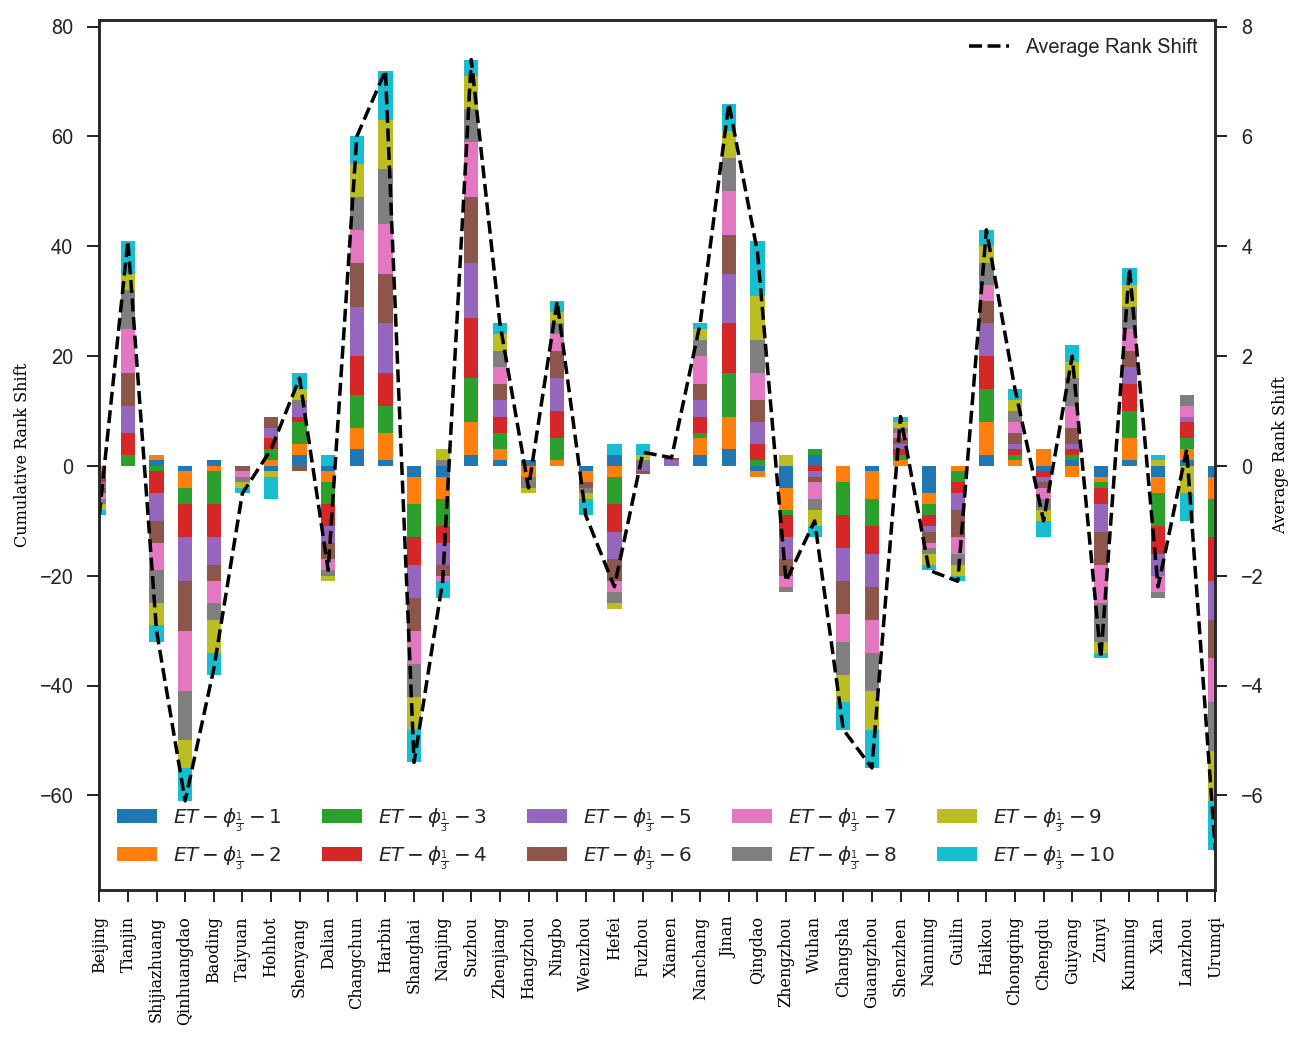

In [15]:
labels = [r'$ET-\phi_{\frac{1}{3}}-1$',r'$ET-\phi_{\frac{1}{3}}-2$', r'$ET-\phi_{\frac{1}{3}}-3$', r'$ET-\phi_{\frac{1}{3}}-4$',
         r'$ET-\phi_{\frac{1}{3}}-5$', r'$ET-\phi_{\frac{1}{3}}-6$', r'$ET-\phi_{\frac{1}{3}}-7$', r'$ET-\phi_{\frac{1}{3}}-8$',
         r'$ET-\phi_{\frac{1}{3}}-9$', r'$ET-\phi_{\frac{1}{3}}-10$']

fig1 = accum_shift_stacked_bar(rank_shift_data_frame, labels)

In [138]:
fig1.savefig('../results/equal_threshod_00_10_phi0.3_accumulated_shift.pdf')

## function
rank_boxplot

rank_shift

accum_shift_stacked_bar

In [42]:
equal_thres_phi05_path = os.path.join(os.path.abspath('..'), 'results', 
                                       'outranking_matrix','equal_threshod_00_10_phi0.5', 'total_rank.csv')

if os.path.exists(equal_thres_phi06_path):
    print('File path: ', equal_thres_phi06_path)
else:
    print('Check the path')

File path:  /Users/rolf/Downloads/noncomp/rank/results/outranking_matrix/equal_threshod_00_10_phi0.3/total_rank.csv


In [43]:
equal_thres_phi05_data = pd.read_csv(equal_thres_phi05_path, index_col = 0)
equal_thres_phi05_data.head()

,equal_threshold_00,equal_threshold_01,equal_threshold_02,equal_threshold_03,equal_threshold_04,equal_threshold_05,equal_threshold_06,equal_threshold_07,equal_threshold_08,equal_threshold_09,equal_threshold_10
Beijing,2,2,1,1,1,1,1.0,1,1,1,1
Tianjin,29,29,29,31,33,34,35.0,37,36,32,35
Shijiazhuang,33,34,34,32,29,28,29.0,28,27,29,30
Qinhuangdao,27,26,24,24,21,19,18.0,16,18,22,21
Baoding,36,37,35,30,30,31,33.0,32,33,30,32


In [44]:
equal_thres_phi03_data.equals(equal_thres_phi05_data)

True

In [45]:
equal_thres_phi06_path = os.path.join(os.path.abspath('..'), 'results', 
                                       'outranking_matrix','equal_threshod_00_10_phi0.6', 'total_rank.csv')

if os.path.exists(equal_thres_phi06_path):
    print('File path: ', equal_thres_phi06_path)
else:
    print('Check the path')

File path:  /Users/rolf/Downloads/noncomp/rank/results/outranking_matrix/equal_threshod_00_10_phi0.6/total_rank.csv


In [46]:
equal_thres_phi06_data = pd.read_csv(equal_thres_phi06_path, index_col = 0)
equal_thres_phi06_data.head()

,equal_threshold_00,equal_threshold_01,equal_threshold_02,equal_threshold_03,equal_threshold_04,equal_threshold_05,equal_threshold_06,equal_threshold_07,equal_threshold_08,equal_threshold_09,equal_threshold_10
Beijing,2,2,1,1,1,1,1.0,1,1,1,1
Tianjin,29,29,29,31,33,34,35.0,37,36,32,35
Shijiazhuang,33,34,34,32,29,28,29.0,28,27,29,30
Qinhuangdao,27,26,24,24,21,19,18.0,16,18,22,21
Baoding,36,37,35,30,30,31,33.0,32,33,30,32


In [47]:
equal_thres_phi03_data.equals(equal_thres_phi06_data)

True

## Strange thing happen: no matter which value phi is, equal thresholds sensitivity analysis conclude some results.